# GD9. Segmentation

## 9-1. 들어가며
- 이미지 분류, 객체 인식 모델은 이미지에서 어떤 물체의 종류를 분류하거나 물체의 존재와 위치를 탐지해 냄. 
- 세그멘테이션은 **픽셀 수준**에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리하는 방법임.  
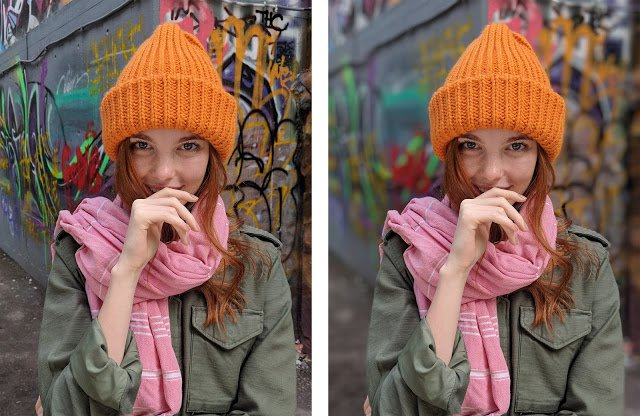

[(오른쪽) 인물사진 모드]
https://ai.googleblog.com/2017/10/portrait-mode-on-pixel-2-and-pixel-2-xl.html

- 세그멘테이션은 **이미지 분할** 기술임. 위 사진에서 세그멘테이션 모델은 사람의 영역과 배경 영역을 분리해 배경을 흐리게 처리해 아웃포커싱 효과를 보여줌. 
- 세그멘테이션은 이미지의 영역을 어떤 영역인지 분리하는 기술로 다양한 영역에서 활용됨. 

## 9-2. 세그멘테이션 문제의 종류
- 이미지 내에서 영역을 분리하는 접근 방식은 크게 두 가지 방식이 있음. 
- 시맨틱 세그멘테이션과 인스턴스 세그멘테이션임. 
- 영역을 분리한다는 관점에서 비슷하지만, 접근 방식에 따라 문제의 정의와 모델을 구성하는 방식이 달라짐.  
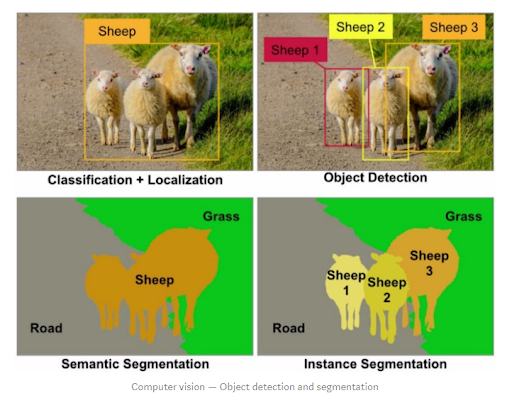

http://machinelearningkorea.com/2019/07/13/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B3%84-%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C/

- 좌상단 사진은 사진에서 단지 어떤 물체들이 모여 있는 영역의 위치를 localization, 이 물체들이 양이라는 것을 classification하는 접근법을 보여줌. 
- 우상단 사진은 비슷하지만 개별 양들의 개체 하나하나의 위치를 정확히 식별하는 object detection의 접근법을 보여줌. 
- 좌하단의 경우 양, 길, 풀밭의 영역을 정확히 구분해낼 뿐 양들 각각을 구분하진 않음 -> **시맨틱 세그멘테이션**
- 우하단의 경우 각 양의 개체들의 영역을 픽셀 단위로 정확히 구분함 -> **인스턴스 세그멘테이션**

### 1) 시맨틱 세그멘테이션 (Semantic Segmentation)
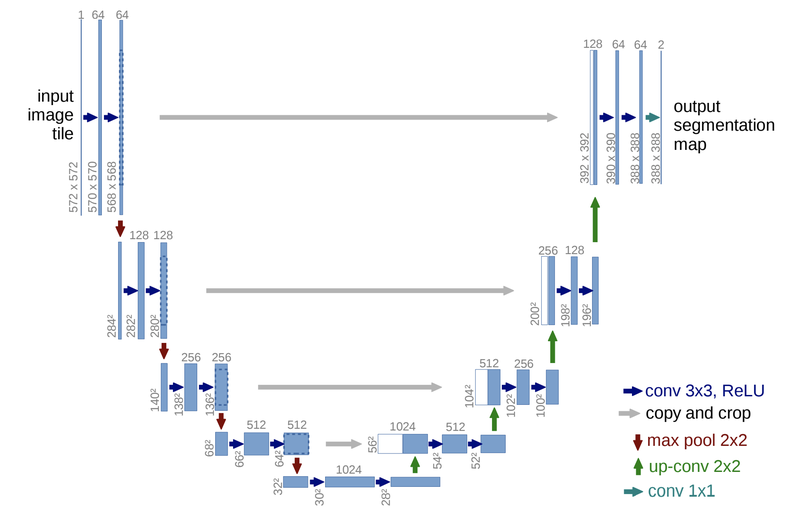

https://arxiv.org/pdf/1505.04597.pdf


- 위 모델 구조는 시맨틱 세그멘테이션의 대표적인 모델인 U-Net의 구조임. 
- 간단히 살펴보면, 입력으로 572x572 크기의 이미지가 들어가고 출력으로 388x388의 크기에 두 가지 클래스를 가진 세그멘테이션 맵이 나옴 -> 두 가지 클래스는 가장 마지막 레이어의 채널 개수가 2라는 점에서 확인 가능함.
- 이 때 두 가지 클래스를 문제에 따라 다르게 정의하면 **클래스에 따른 시맨틱 세그멘테이션 맵**을 얻을 수 있음. 
- 이미지 분류나 물체 검출 문제보다 확실히 출력값이 큼 -> 세그멘테이션을 위해서 이미지의 각 픽셀에 해당하는 영역의 클래스별 정보가 필요하기 때문임. 

### 2) 인스턴스 세그멘테이션 (Instance Segmentation)
- 인스턴스 세그멘테이션은 같은 클래스 내에서도 각 개체(instance)들을 분리해 세그멘테이션을 수행함. 
- 물체 검출 모델로 각 개체를 구분하고 이후에 각 개체 별로 시맨틱 세그멘테이션을 수행하면 인스턴스 세그멘테이션이 가능할지도...
- 이러한 방식 중 대표적인 것이 **Mask R-CNN**임.
  - 2-stage Object Detection의 가장 대표적인 Faster R-CNN을 계승한 것으로서, Faster R-CNN의 아이디어인 Region of Interest Pooling Layer(RoIPool) 개념을 개선해 정확한 세그멘테이션에 유리하게 한 **RoIAlign, 클래스별 마스크 분리**라는 단순한 두 가지 아이디어를 통해, 클래스별 Object Detection과 시맨틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델임.  
  - RoIPool Layer는 다양한 RoI 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해 내는 레이어임. 이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론함. 
  - 세그멘테이션 문제에서 문제가 되는 것은 RoIPool 과정에서 Quantization이 필요하다는 점임. 
  - 아래 그림의 예에서는 16x16으로 분할함. 이미지에서 RoI 영역의 크기는 다양한데 모든 RoI 영역의 가로/세로 픽셀 크기가 16의 배수인 것은 아님 -> 어쩔 수 업이 RoI 영역 밖이 포함되는 경우도 있고, 자투리 영역이 버려지는 경우도 생기게 됨 ->  이런 상황은 필연적으로 시맨틱 세그멘테이션의 정보손실과 왜곡을 야기함.  
  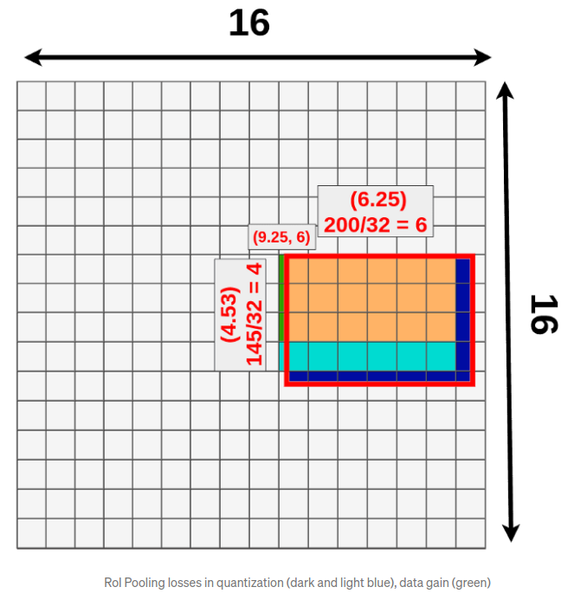

https://towardsdatascience.com/understanding-region-of-interest-part-2-roi-align-and-roi-warp-f795196fc193


  - 위 그림에서 가로 200, 세로 145의 영역에 대해 3x3 RoI Pool을 적용했을 때, 이는 가로 / 세로 각각 3의 배수만큼만 적용되므로, 진한 파랑, 연한 파랑색 영역은 정보를 잃어버리게 되고, 녹색 영역이 불필요하게 포함됨. 
  - Mask R-CNN의 RoIAlign은 Quantization하지 않고도 RoI를 처리할 고정 사이즈의 feature map을 생성할 수 있게 아이디어를 제공함 -> 아이디어의 핵심은 RoI 영역을 pooling layer의 크기에 맞춰 등분한 후, RoIPool을 했을 때의 quantization 영역 중 가까운 것들과의 bilinear interpolation 계산을 통해 생성해야 할 Feature Map을 계산해 낸다는 점이라고 함 -> 무슨 말인지 모르겠음. 
  - Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 RoIAlign 방식으로 개선하고 세그멘테이션을 더한 방식임. 아래 Faster R-CNN과 비교한 구조도를 보면 U-Net처럼 피처 맵의 크기를 키워 마스크를 생성해내는 부분을 통해 인스턴스에 해당하는 영역, 즉 인스턴스 맵을 추론함 -> Mask R-CNN은 클래스에 따른 마스크를 예측할 때 여러 가지 태스크를 한 모델로 학습해 물체 검출의 성능을 높임. 
  - 아래 그림에서 Bounding box regression을 하는 `Bbox Head`와 마스크를 예측하는 `Mask Head`의 두 갈래로 나뉘는 것을 볼 수 있음. Mask map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 특성 맵 크기를 갖는데, RoIAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있음. 
  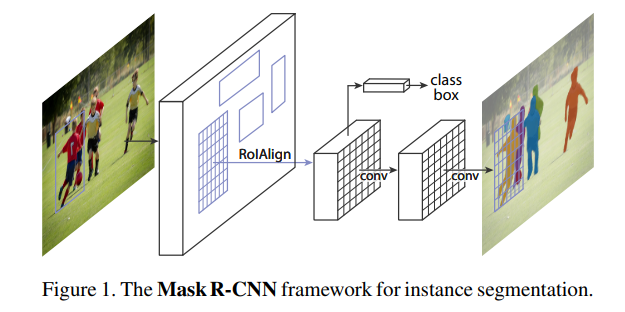

  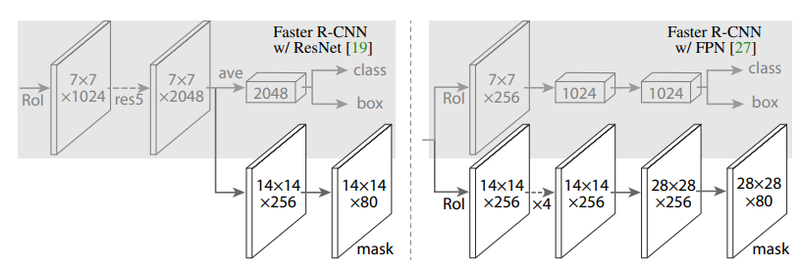

https://arxiv.org/pdf/1703.06870.pdf 캡처


## 9-3. 주요 세그멘테이션 모델 (1) FCN
- 세그멘테이션도 오랜 시간 그 목적에 따라서 여러 가지 모델이 발전되어 옴. 
- 시간 순서대로 Fully Convolutional Networks for Semantic Segmentation 논문의 **FCN(Fully Convolutional Network)**부터 살펴보자.  

> 주요 참고 자료
- FCN 논문 리뷰 - [Fully Convolutional Networks for Semantic Segmentation](https://medium.com/@msmapark2/fcn-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-fully-convolutional-networks-for-semantic-segmentation-81f016d76204)
- 원본 논문 : [Fully Convolutional Networks for Semantic Segmentaiton](https://arxiv.org/abs/1411.4038)  

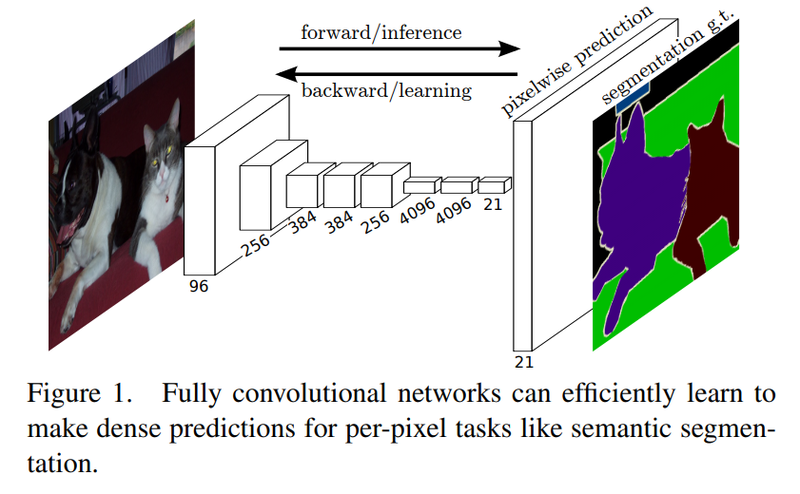

- FCN은 이미지넷 챌린지(ImageNet Challenge)에서 좋은 성적을 거둔 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델임. 
- 기본적인 VGG 모델은 이미지의 특성을 추출하기 위한 네트워크의 뒷단에 fully connected layer를 붙여서 계산한 클래스별 확률을 바탕으로 이미지 분류를 수행함. 
- FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 fully connected layer 대신 CNN을 붙여줌.  
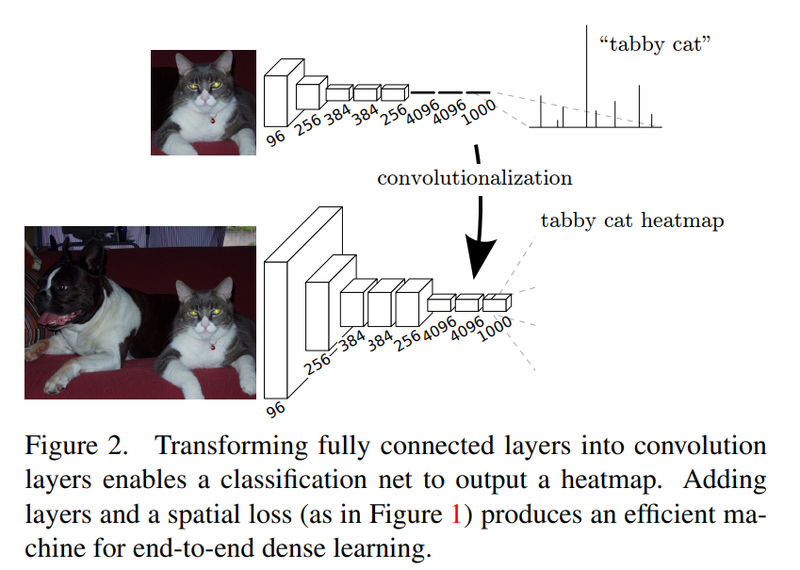

- 여기서 fully connected layer 대신 CNN은 붙여주는 이유가 뭘까?
- CNN은 이미지 내 위치의 특성을 유지함. 하지만 fully connected layer는 위치를 고려하지 않게 됨 -> 위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해, fully connected layer를 CNN으로 대체함. 
- 위치의 특성을 유지하면서 이미지 분류를 하기 위해서 마지막 CNN은 **1x1 커널 크기와 클래스의 개수만큼의 채널을 가짐** -> 이렇게 CNN을 거치면 클래스 히트맵을 얻을 수 있음. 
- 하지만 히트맵의 크기는 일반적으로 원본 이미지보다 작음. (CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문임) -> 이를 키워주는 방법을 **upsampling**이라고 함. Upsampling에는 여러 가지 방법이 있음. 그 중 FCN에서는 Deconvolution과 Interpolation 방식을 활용함. 
- Deconvolution은 컨볼루션 연산을 거꾸로 해준 것으로 볼 수 있음. Interpolation은 보간법으로 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꿔야 하는 중간 픽셀들을 의미)을 추정하는 방법임.  

> Linear interpolation과 Bilinear interpolation의 차이
- 1차원 상의 두 개의 점 사이에서 거리 비에 따라 추정하는 것을 Linear interpolation이라고 함. 
- 이를 2차원으로 확장해 4개의 점 사이에서 어떤 점의 값을 추정하는 것을 Bilinear interpolation이라고 함.  


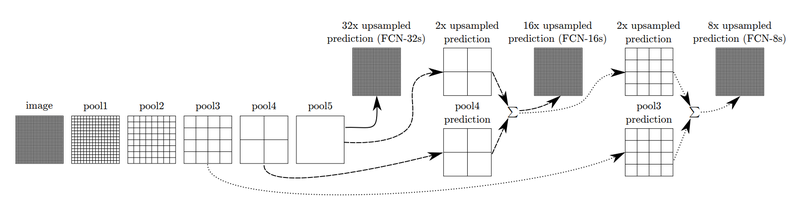

- Upsampling만 하면 원하는 세그멘테이션 맵을 얻을 수 있음 -> FCN-32s의 경우라고 함. 
- 논문에서는 더 나은 성능을 위해 한 가지 기법을 더함. 위 그림에서 확인할 수 있는 **Skip Architecture**라는 방법임. FCN-16s는 앞쪽 블록에서 얻은 예측 결과 맵과, 2배로 upsampling한 맵을 더한 후, 한 번에 16배로 upsampling을 해서 얻음. 여기서 한 번 더 앞쪽 블록을 사용하면 FCN-8s를 얻을 수 있음 이 기법으로 나아지는 결과를 논문 원문에서 소개된 아래 그림에서 확인할 수 있음. 
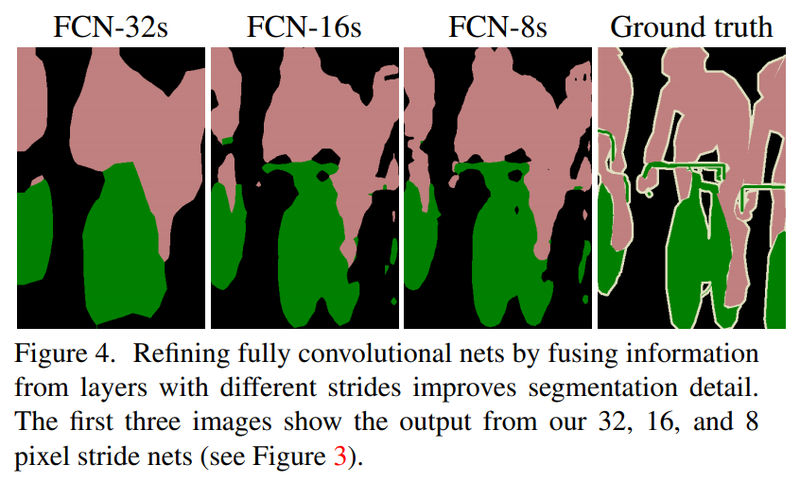

## 9-4. 주요 세그멘테이션 모델 (2) U-Net

> 주요 참고 자료
- U-Net 논문 리뷰 - [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a)
- 원본 논문 : [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/pdf/1505.04597.pdf)  


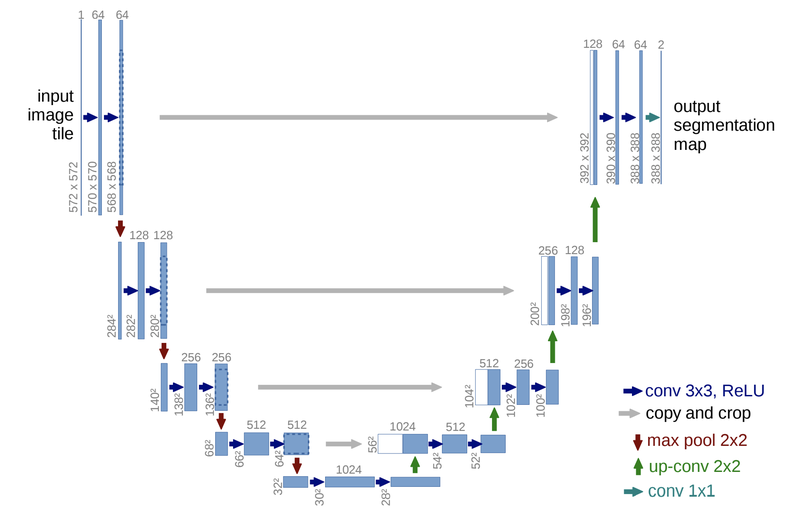

- U-Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띰. **FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것임.** 특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 태스크에서도 사용되는 유명한 네트워크가 되었지만, 본래 의학 관련 논문으로 시작되었다는 점임. (오...) 아래 Fig.2 그림과 같이 세포의 영역을 세그멘테이션 하기 위해 개발된 방법임. 

### 전체 구조
- 논문에서는 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두 가지로 구분함. 
- 좌측의 Contracting path는 일반적으로 우리가 사용해온 Convolution network와 유사한 구조를 가짐. 각 블록은 두 개의 3x3 convolution 계층과 ReLu를 가지고 그 뒤로 downsampling을 우해서 2x2 커널을 2 stride로 max pooling을 하게 됨. Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계됨. 
- Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어남. Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두 개씩 사용됨. 
- 두 Path에서 크기가 같은 블록의 출력과 입력은 **skip connection처럼 연결해 low-level의 feature를 활용**할 수 있도록 함. 마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 만들 수 있음. 
- 결과적으로, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵이 나옴. 마지막 세그멘테이션 맵의 크기가 입력 이미지의 크기와 다른 것은 세그멘테이션 맵을 원하는 크기로 조정해 해결할 수 있음 -> 원본 이미지에 맞게 크기를 조정해주면 위에서 봤던 우리가 원하는 시맨틱 세그멘테이션 결과를 얻을 수 있음.  

> U-Net의 구조가 대칭이지만 모델의 입력값과 출력값의 크기가 다른 이유
- Convolution은 padding을 통해서 크기를 같게 유지할 수 있으나, U-Net에선 padding을 하지 않아서 deconvolution으로 확대하더라도 원래 이미지 크기가 될 수 없음. 

### 타일(Tile) 기법
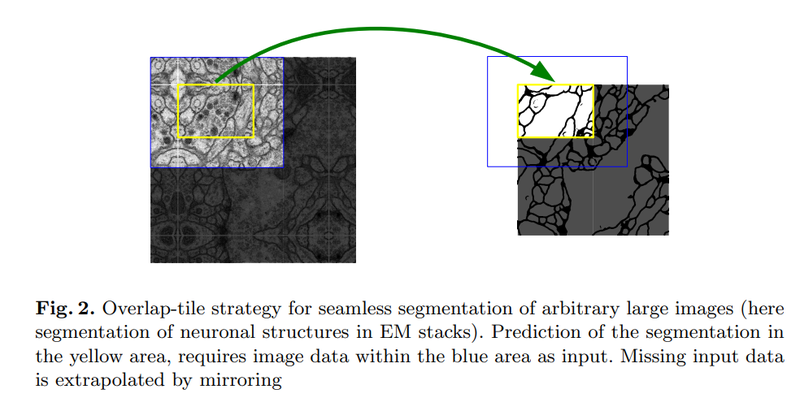

- FCN은 입력 이미지의 크기를 조정해 세그멘테이션 맵을 얻어냈음. 반면 U-Net은 타일(tile) 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나눠 네트워크를 추론, 큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 함. 

### 데이터 불균형 해결
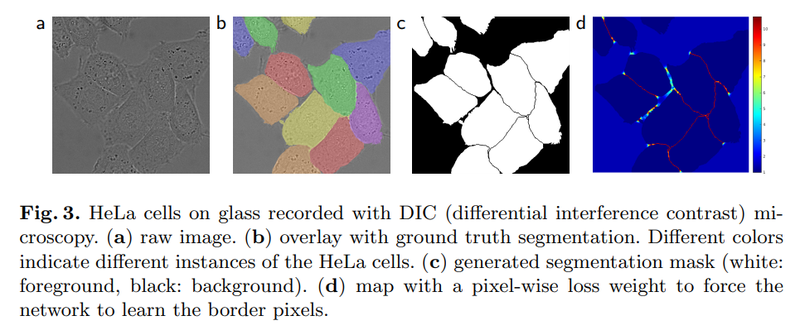

- 세포를 검출하기 위해서는 세포들의 영역뿐만 아니라 경계 또한 예측을 해야 함. 이 때 픽셀 단위로 라벨을 매긴다고 생각하면, 데이터셋에 세포나 배경보다는 절대적으로 세포 간 겨계의 면적이 작을 것임 -> 이러한 **클래스 간 데이터 양의 불균형을 해결하기 위해** 분포를 고려한 **weight map**을 학습 때 사용했다고 함. 
- 여기서 weight map의 weight는 신경망의 학습 파라미터를 가리키는 weight가 아니라 **손실 함수에 적용되는 가중치**를 말함. 의료 영상에서 세포 내부나 배경보다는 상대적으로 면적이 작은 세포 경계를 명확히 추론해내는 것이 더욱 중요하기 때문에, 세포 경계의 손실에 더 많은 패널티를 부과하는 방식이라고 함 -> 솔직히 와닿지는 않아서 더 공부가 필요할 듯. 

## 9-5. 주요 세그멘테이션 모델 (3) DeepLab 계열
> 주요 참고 자료
- [Lunit 기술블로그의 DeepLab V3+: Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation](https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/)
- hyunjulie님의 2편: [두 접근의 접점](https://medium.com/hyunjulie/2%ED%8E%B8-%EB%91%90-%EC%A0%91%EA%B7%BC%EC%9D%98-%EC%A0%91%EC%A0%90-deeplab-v3-ef7316d4209d), [DeepLab V3+](https://medium.com/hyunjulie/2%ED%8E%B8-%EB%91%90-%EC%A0%91%EA%B7%BC%EC%9D%98-%EC%A0%91%EC%A0%90-deeplab-v3-ef7316d4209d)
- 원본 논문: [Encoder-Decoder with Atrous Separable Convolution for Semantic Image Segmentation](https://arxiv.org/pdf/1802.02611.pdf)

- DeepLabV3+는 이름에서 볼 수 있듯이 이전의 많은 버전을 거쳐 개선을 이뤄온 네트워크임. 처음 DeepLab 모델이 제안된 뒤 이 모델을 개선하기 위해 Atrous Convolution과 Spatial Pyramid Pooling 등 많은 방법들이 제안됨. 

### 전체 구조
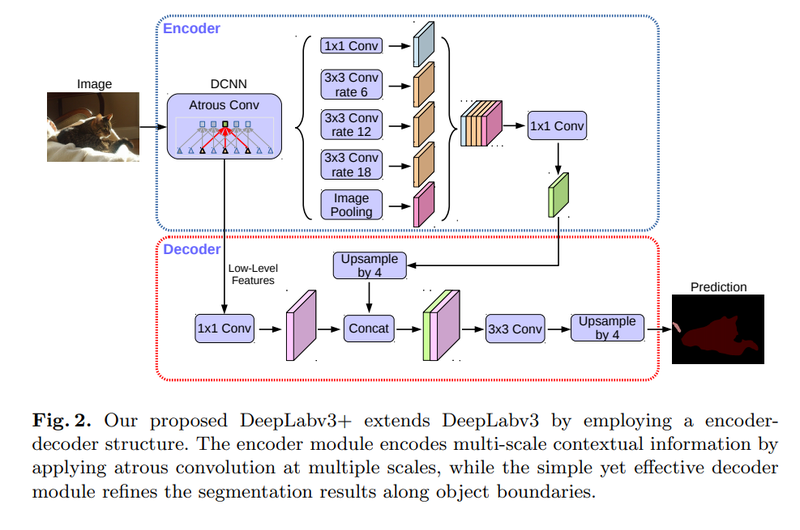

- U-Net의 Contracting path와 Expansive path의 역할을 하는 것이 여기서는 인코더와 디코더임. 
- 인코더는 이미지에서 필요한 정보를 특성으로 추출해내는 모듈이고, 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈임. 3x3 convolution을 사용했던 U-Net과 달리 DeepLabV3+는 Atrous Convolution을 사용하고 있음. Atrous Convolution을 여러 크기에 맞게 다양하게 적용한 것이 ASPP(Astrous Spatial Pyramid Pooling)임. DeepLabV3+는 ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻고 있음. 
- DeepLabV3+의 핵심을 이루는 두 가지 개념을 살펴보자.

### Atrous Convolution
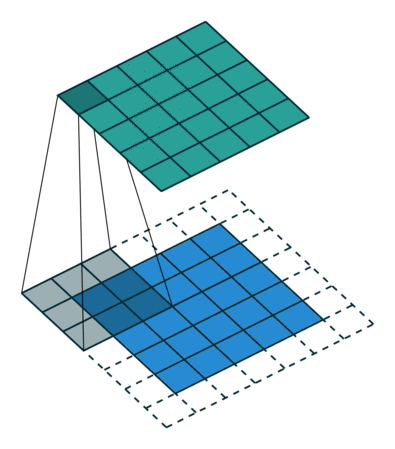

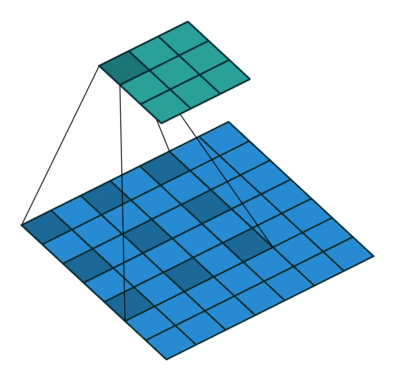

- Atrous Convolution은 간단히 말해 "띄엄띄엄 보는 컨볼루션"임. 위 그림에서 아래쪽의 Atrous convolution은 위쪽의 일반적인 컨볼루션과 달리 더 넓은 영역을 보도로 하기 위한 방법으로 커널이 일정 간격으로 떨어져 있음 -> 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 됨. 
- [딥러닝에서 사용되는 여러 유형의 Convolution 소개(딥러닝에서 사용되는 여러 유형의 Convolution 소개)](https://zzsza.github.io/data/2018/02/23/introduction-convolution/)

### Spatial Pyramid Pooling
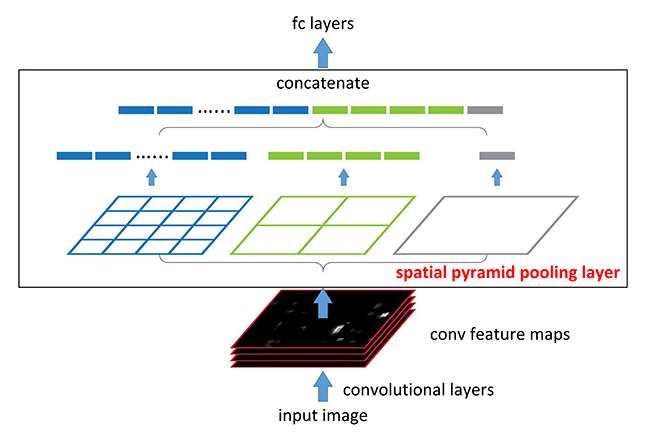

[[출처] http://kaiminghe.com/eccv14sppnet/index.html]

- Spatial Pyramid Pooling은 위 그림처럼 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)함. 이를 통해 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있음. 여기서 컨볼루션을 Atrous Convolution으로 바꿔 적용한 것을 Atrous Spatial Pyramid Pooling이라고 함. 이러한 아키텍쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있음 -> 따라서 제각기 다양한 크기와 비율을 갖는 RoI 영역에 대해 적용하기에 유리함. 
- [갈아먹는 Object Detection - Spatial Pyramid Pooling Network](https://yeomko.tistory.com/14)

## 9-6. 세그멘테이션의 평가
-  읽어보기 : [Evaluating image segmentation models](https://www.jeremyjordan.me/evaluating-image-segmentation-models/)
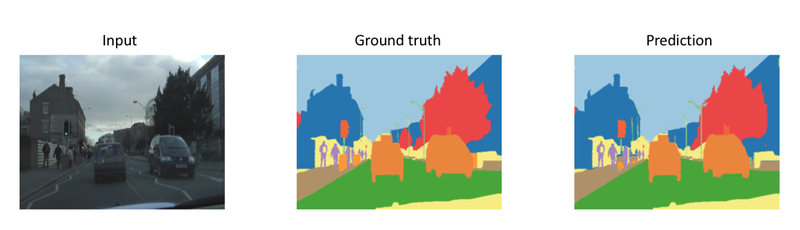

https://www.jeremyjordan.me/evaluating-image-segmentation-models/

- 지금까지 딥러닝 기반으로 시맨틱 세그멘테이션을 수행하는 다양한 방법들을 확인해 봄. 
- 이제 이렇게 만들어진 모델을 평가하는 평가 지표를 알아보자. 
- 일반적으로 시맨틱 세그멘테이션의 결과값은 **이미지의 크기에 맞는 세그멘테이션 맵 크기**와 **시맨틱 클래스의 수에 맞는 채널 크기**를 가짐. 여기서 각 채널의 max probability에 따라허 해당 위치의 클래스가 결정됨. 

### 1) 픽셀별 정확도 (Pixel Accuracy)
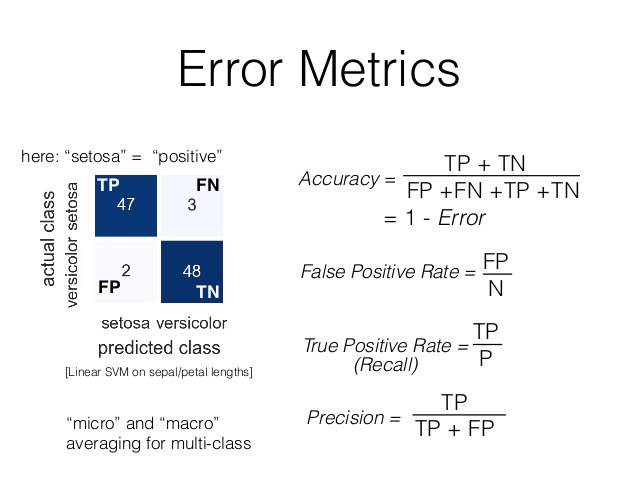

https://www.slideshare.net/SebastianRaschka/nextgen-talk-022015/34-Error_MetricsTPLinear_SVM_on_sepalpetal


- Pixel Accuracy는 쉽게 말해 픽셀별 정확도를 의미함. 
- 세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제로 생각했을 때, 마치 이미지 분류 문제와 비슷하게 픽셀별 분류 정확도를 세그멘테이션 모델을 평가하는 기준으로 생각할 수 있음. 
- 이 때 예측 결과 맵을 클래스 별로 평가하는 경우에는 이진 분류 문제로 생각해 픽셀 및 채널 별로 평가함. 픽셀별 이미지 분류 문제로 평가하는 경우에는 픽셀별로 정답 클래스를 맞췄는지의 여부, True/False를 구분함. 

### 2) 마스크 IoU (Mask Intersection-over-Union)
- 물체 검출 모델을 평가할 때는 정답 라벨과 예측 결과 바운딩 박스 사이의 IoU를 사용함. 마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산할 수 있음. 아래 식처럼 세그멘테이션의 마스크의 IoU는 생각보다 쉽게 계산할 수 있음.  

```python
# sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)
```  

- 마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있음. 이를 평균하면 전체적인 시맨틱 세그멘테이션 성능을 가늠할 수 있음. 

## 9-7. Upsampling의 다양한 방법
- 세그멘테이션에서는 마스킹 단계에서 Upsampling이 중요하게 사용되었다는 것을 알 수 있음. 

### 1) Nearest Neighbor
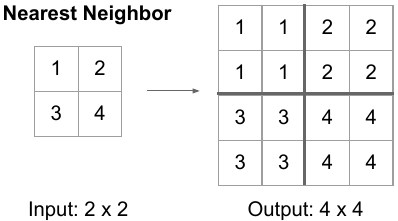

- Nearest upsampling은 이름 그대로 스케일을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법임. 
- 위 그림처럼 2x2 matrix가 있을 때, 이를 2배로 키우면 4x4 matrix가 됨. 

### 2) Bilinear Interpolation
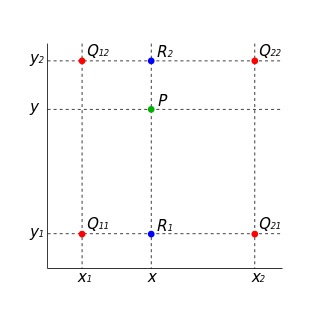

- 두 축에 대해 선형보간법을 통해 필요한 값을 메우는 방식임. 
- 위 그림에서 두 가지 interpolation을 적용한 것을 순서대로 확인할 수 있음. $R_1$이 $Q_{11}$과 $Q_{21}$의 x축 방향의 interpolation 결과임. 그리고 $R_2$는 $Q_{12}$와 $Q_{22}$의 x축 방향의 interpolation 결과임. 그리고 $R_1$과 $R_2$를 y축 방향으로 interpolation하면 새로운 위치 P의 값을 추정할 수 있음. 
- 이러한 선형 보간법으로 Interpolation을 하는 방법이 있고, Bicubic interpolation의 경우 삼차보간법을 사용한다고 함. 
- [bskyvision의 선형보간법(linear interpolation)과 삼차보간법(cubic interpolation), 제대로 이해하자](https://bskyvision.com/m/789)

### 3) Transposed Convolution
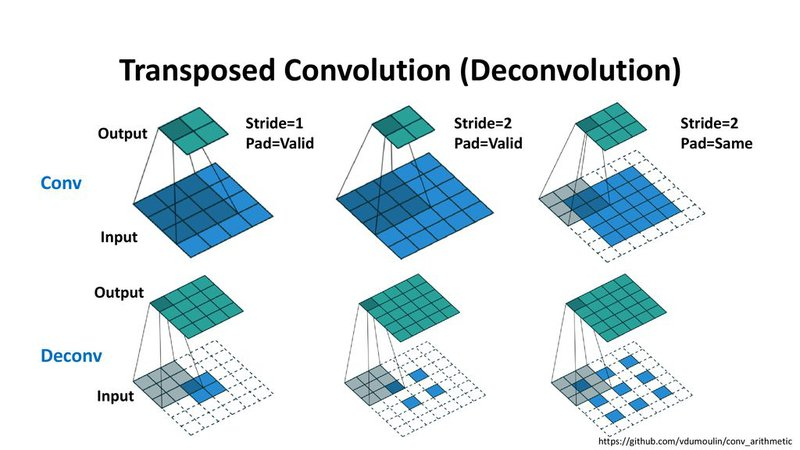

- 지금까지 봤던 방식은 정해진 규칙에 따라서 upscaling하는 방법들임. 
- 학습할 수 있는 파라미터를 가진 Upsampling 방법 중 하나가 Transposed Convolution임.
- 우리가 사용해 온 Convolution Layer는 커널의 크기를 정의하고 입력된 피처를 Window에 따라서 output을 계산함. Transposed Convolution은 이와 반대의 연산을 함. 따라서 거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정함. 
- 상세한 과정은 [zzsza님의 Up-sampling with Transposed Convolution 번역](https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/) 참고. 